In [4]:
import os
from os import listdir
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.io import imshow, imread
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from matplotlib import pyplot as plt
from skimage.io import imshow, imread
from PIL import Image
import cv2

image_path_list = os.listdir("newimage2")
df = pd.DataFrame()
for i in range(len(image_path_list)):
    filename = image_path_list[i]
    if filename.endswith('.jpg'):
        try:
            img = Image.open("newimage2/"+filename) # open the image file
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove("newimage2/"+filename) 
            continue
        image = rgb2gray(imread("newimage2/"+filename))
        binary = image < threshold_otsu(image)
        #imshow(binary)
        #plt.figure()
        #imshow(image)
        #plt.figure()
        binary = closing(binary)
        label_img = label(binary)
  
        table = pd.DataFrame(regionprops_table(label_img, image,
                          ['convex_area', 'area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation', 'moments_central',
                           'moments_hu', 'euler_number',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
        table['perimeter_area_ratio'] = table['perimeter']/table['area']
        real_images = []
        std = []
        mean = []
        percent25 = []
        percent75 = []
        for prop in regionprops(label_img): 
            min_row, min_col, max_row, max_col = prop.bbox
            img = image[min_row:max_row,min_col:max_col]
            real_images += [img]
            mean += [np.mean(img)]
            std += [np.std(img)]
            percent25 += [np.percentile(img, 25)] 
            percent75 += [np.percentile(img, 75)]
        table['real_images'] = real_images
        table['mean_intensity'] = mean
        table['std_intensity'] = std
        table['25th Percentile'] = mean
        table['75th Percentile'] = std
        table['iqr'] = table['75th Percentile'] - table['25th Percentile']
        table['label'] = filename[5]
        df = pd.concat([df, table], axis=0)
        
df.head(len(image_path_list))


,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,50303,39912,0.784280,0.793085,7393.952342,-227.080709,-227.080709,2861.680897,344.216243,213.553998,...,0,183,275,0.071917,"[[0.028857647058823533, 0.02493607843137255, 0...",0.256094,0.176746,0.256094,0.079348,t
1,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,113,50,114,0.000000,[[0.26618901960784314]],0.000000,0.266189,0.000000,-0.266189,t
2,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,112,62,113,0.000000,[[0.3787701960784314]],0.000000,0.378770,0.000000,-0.378770,t
3,18,15,0.916326,0.535714,0.826667,-0.866667,-0.866667,2.666667,6.940425,2.779179,...,95,70,99,0.951878,"[[0.14027450980392156, 0.6454219607843138, 0.8...",0.265299,0.376741,0.265299,-0.111442,t
4,4,4,0.924176,0.666667,0.500000,0.250000,0.250000,0.250000,3.236068,1.236068,...,133,73,136,1.103553,"[[0.6894686274509805, 0.21957843137254904, 0.1...",0.194670,0.327697,0.194670,-0.133027,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,358,355,359,0.000000,[[0.37636823529411767]],0.000000,0.376368,0.000000,-0.376368,t
84,904,521,0.857128,0.425654,87.627212,-51.898851,-51.898851,91.254512,47.559881,24.498271,...,462,388,498,0.275098,"[[0.43634823529411765, 0.38737764705882355, 0....",0.158681,0.431815,0.158681,-0.273134,t
85,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,358,358,359,0.000000,[[0.3638]],0.000000,0.363800,0.000000,-0.363800,t
86,4,4,1.000000,1.000000,0.000000,-0.000000,-0.000000,1.250000,4.472136,0.000000,...,417,361,418,0.500000,"[[0.36688117647058827], [0.3691282352941177], ...",0.009731,0.358355,0.009731,-0.348624,t


In [ ]:
!python -m pip install -U scikit-image

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('datapp3.csv')
df.head()
df.shape
import PIL
import os
import os.path
from PIL import Image

image_path_list = os.listdir("newimage2")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

df4=pd.DataFrame()
print(df4.head())
for i in range(len(image_path_list)):
    filename = image_path_list[i]
    if filename.endswith('.jpg'):
        try:
            img = Image.open("newimage2/"+filename) # open the image file
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove("newimage2/"+filename) 
            continue
        image = imread("newimage2/"+filename, as_gray=True)
        #imshow(image)
        a=image.shape
        features = np.reshape(image, a)
        x=features[0:1,0:17]
        df5= pd.DataFrame(x)
        df4=df4.append(df5,ignore_index=True)

df4.insert(0,"id",[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102],True)
image.shape
re=pd.merge(df,df4)
re.shape

X = re.drop(['id','species','medicinal'], axis=1)
y = re['medicinal']

print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

Empty DataFrame
Columns: []
Index: []
(101, 19) (101,)


C:\Users\Nishanth gowda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nishanth gowda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nishanth gowda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Nishanth gowda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support 

0.967741935483871


0.967741935483871
0.8709677419354839


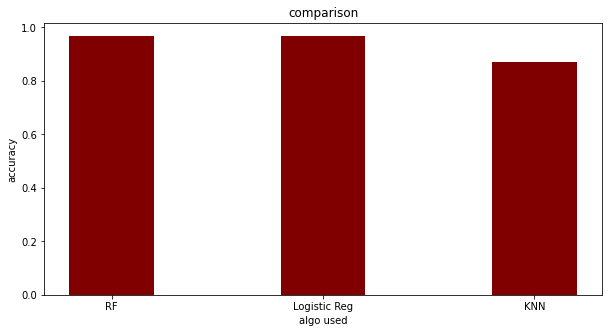

C:\Users\Nishanth gowda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Specie Name,Medicinal or Not
0,Aconite,0
1,Ageratina-altissima,0
2,Ajwain,1
3,American Ivy,0
4,Amla,1
...,...,...
96,Water hemlock,0
97,White snakeroot,0
98,Withania somnifera,1
99,Wolfsbane,0


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
list1=[]
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy1=metrics.accuracy_score(y_test,y_pred)
list1.append(accuracy1)
print(metrics.accuracy_score(y_test,y_pred))
print("\n")

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression                                                  
model=LogisticRegression()
model.fit(X_train,y_train)                                                                                                       
pred=model.predict(X_test)                                                                                                  
#metrics.confusion_matrix(y_test,pred)
accuracy3=metrics.accuracy_score(y_test,y_pred)
list1.append(accuracy3)
print(metrics.accuracy_score(y_test,y_pred))


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)                                  knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy2=metrics.accuracy_score(y_test, y_pred)
list1.append(accuracy2)
print(metrics.accuracy_score(y_test, y_pred))

algo=['RF','Logistic Reg', 'KNN']
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algo, list1, color ='maroon',
        width = 0.4)
 
plt.xlabel("algo used")
plt.ylabel("accuracy")
plt.title("comparison")
plt.show()


row=re.iloc[-(len(image_path_list)):]
name=row.pop('species')
row.pop('medicinal')
test_id=row.pop('id')
row.head(len(image_path_list))


from sklearn.preprocessing import StandardScaler

x_test = row.values

scaler = StandardScaler()

x_test = scaler.fit_transform(x_test)

y_pred = clf.predict_proba(x_test)
#y_pred



test_pred = clf.predict(row)

output = pd.DataFrame({'Specie Name':name,'Medicinal or Not':test_pred
                    })
output.to_csv('submission.csv', index=False)
output = output.reset_index(drop=True)
output.head(len(image_path_list))

In [ ]:
!pip install tqdm